# Red Card Exploratory Data Analysis

# *introduction*

## *abstract*

I analyzed the data from scoccer player and referee playing in the 2012-2013 in the first male divisions of Europe. The aim of discovering is that any relevant between player skintone and getting redcards rate. 

**todo**


### *Research Question*: 
> ### If the player were lighter, a referee is more likely to have given a redcard or no card for the same offense under the same conditions


> ### Darker players have positive coefficient on regression against proportion red/total card

### *summary*: 

Although I can observe that dark skinned players are more likely to be sent off or get redcards, I have no evidence to suggest racism on the part of the referees. 

And there is no strong correlation between skintone and redcards.

### dataset

* ### skin tones
>Player’s photo was available from the source for 1,586 out of 2,053 players. ​Players’ skin tone was coded by two independent raters blind to the research question who, based on their profile photo, categorized players on a 5-point scale ranging from “very light skin” to “very dark skin” with “neither dark nor light skin” as the center value





* ### bias scores (about refrees)
>  implicit bias scores for each referee country were calculated using a race implicit association test (IAT), with higher values corresponding to faster white | good, black | bad associations. Explicit bias scores for each referee country were calculated using a racial thermometer task, with higher values corresponding to greater feelings of warmth toward whites versus blacks. Both these measures were created by aggregating data from many online users in referee countries taking these tests on ​Project Implicit​.

### **Data Structure**
The dataset is available as a list with 146,028 dyads of players and referees and includes details from players, details from referees and details regarding the interactions of player-referees. A summary of the variables of interest can be seen below. A detailed description of all variables included can be seen in the README file on the project website.

https://osf.io/jv6yw/files/

| Variable Name: | Variable Description: | 
| -- | -- | 
| playerShort | short player ID | 
| player | player name | 
| club | player club | 
| leagueCountry | country of player club (England, Germany, France, and Spain) | 
| height | player height (in cm) | 
| weight | player weight (in kg) | 
| position | player position | 
| games | number of games in the player-referee dyad | 
| goals | number of goals in the player-referee dyad | 
| yellowCards | number of yellow cards player received from the referee | 
| yellowReds | number of yellow-red cards player received from the referee | 
| redCards | number of red cards player received from the referee | 
| photoID | ID of player photo (if available) | 
| rater1 | skin rating of photo by rater 1 | 
| rater2 | skin rating of photo by rater 2 | 
| refNum | unique referee ID number (referee name removed for anonymizing purposes) | 
| refCountry | unique referee country ID number | 
| meanIAT | mean implicit bias score (using the race IAT) for referee country | 
| nIAT | sample size for race IAT in that particular country | 
| seIAT | standard error for mean estimate of race IAT   | 
| meanExp | mean explicit bias score (using a racial thermometer task) for referee country | 
| nExp | sample size for explicit bias in that particular country | 
| seExp |  standard error for mean estimate of explicit bias measure | 



* ### Loading the data and analysis libraries

In [455]:
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.pyplot import GridSpec
import numpy as np
import pandas as pd
import os, sys
import seaborn as sns
sns.set(style="ticks")
from pylab import rcParams
# rcParams['figure.figsize'] = 25, 20
rcParams['font.size'] = 20
rcParams['axes.facecolor'] = 'white'
matplotlib.style.use('ggplot')
import statsmodels.formula.api as smf
import statsmodels.api as sm

%matplotlib inline

In [456]:
data_frame = pd.read_csv("../Datasets/CrowdstormingDataJuly1st.csv") #read rog data

In [457]:
data_frame.head()

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,...,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,...,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,...,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,...,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002


In [458]:
data_frame.shape # 28 features

(146028, 28)

In [459]:
data_frame.describe()

,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,rater1,rater2,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
count,145765.000000,143785.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,124621.000000,124621.000000,146028.000000,146028.000000,145865.000000,1.458650e+05,1.458650e+05,145865.000000,1.458650e+05,145865.000000
mean,181.935938,76.075662,2.921166,1.278344,0.708241,0.934581,0.338058,0.385364,0.011381,0.012559,0.264255,0.302862,1534.827444,29.642842,0.346276,1.969741e+04,6.310849e-04,0.452026,2.044023e+04,0.002994
std,6.738726,7.140906,3.413633,1.790725,1.116793,1.383059,0.906481,0.795333,0.107931,0.112889,0.295382,0.293020,918.736625,27.496189,0.032246,1.271262e+05,4.735857e-03,0.217469,1.306157e+05,0.019723
min,161.000000,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-0.047254,2.000000e+00,2.235373e-07,-1.375000,2.000000e+00,0.000001
25%,177.000000,71.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,641.000000,7.000000,0.334684,1.785000e+03,5.454025e-05,0.336101,1.897000e+03,0.000225
50%,182.000000,76.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,1604.000000,21.000000,0.336628,2.882000e+03,1.508847e-04,0.356446,3.011000e+03,0.000586
75%,187.000000,81.000000,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.250000,0.500000,2345.000000,44.000000,0.369894,7.749000e+03,2.294896e-04,0.588297,7.974000e+03,0.001002
max,203.000000,100.000000,47.000000,29.000000,14.000000,18.000000,23.000000,14.000000,3.000000,2.000000,1.000000,1.000000,3147.000000,161.000000,0.573793,1.975803e+06,2.862871e-01,1.800000,2.029548e+06,1.060660


## data processing
### player

In [460]:
def get_subgroup(dataframe, g_index, g_columns):
    g = dataframe.groupby(g_index).agg({col:'nunique' for col in g_columns})
    if g[g > 1].dropna().shape[0] != 0:
        print(" the group has mult same values !")
    return dataframe.groupby(g_index).agg({col:'max' for col in g_columns})
def load_subgroup(filename, index_col=[0]):
    return pd.read_csv(filename, compression='gzip', index_col=index_col)

In [461]:
player_index = 'playerShort'
player_cols = ['birthday','height','weight','position','rater1','rater2','yellowReds','redCards']
players = get_subgroup(data_frame, player_index, player_cols)
players.head()


,birthday,height,weight,position,rater1,rater2,yellowReds,redCards
playerShort,,,,,,,,
aaron-hughes,08.11.1979,182.0,71.0,Center Back,0.25,0.00,0,0
aaron-hunt,04.09.1986,183.0,73.0,Attacking Midfielder,0.00,0.25,0,1
aaron-lennon,16.04.1987,165.0,63.0,Right Midfielder,0.25,0.25,0,0
aaron-ramsey,26.12.1990,178.0,76.0,Center Midfielder,0.00,0.00,0,1
abdelhamid-el-kaoutari,17.03.1990,180.0,73.0,Center Back,0.25,0.25,1,1


No duplication of player  

In [462]:
def save_subgroup(dataframe, g_index, subgroup_name, prefix='raw_'):
    save_subgroup_filename = "".join([prefix, subgroup_name, ".csv.gz"])
    dataframe.to_csv(save_subgroup_filename, compression='gzip', encoding='UTF-8')
    test_df = pd.read_csv(save_subgroup_filename, compression='gzip', index_col=g_index, encoding='UTF-8')
    # Test that we recover what we send in
    if dataframe.equals(test_df):
        print("Test-passed: we recover the equivalent subgroup dataframe.")
    else:
        print("Warning -- equivalence test!!! Double-check.")

In [463]:
players = get_subgroup(players, player_index, player_cols)
players.head()

,birthday,height,weight,position,rater1,rater2,yellowReds,redCards
playerShort,,,,,,,,
aaron-hughes,08.11.1979,182.0,71.0,Center Back,0.25,0.00,0,0
aaron-hunt,04.09.1986,183.0,73.0,Attacking Midfielder,0.00,0.25,0,1
aaron-lennon,16.04.1987,165.0,63.0,Right Midfielder,0.25,0.25,0,0
aaron-ramsey,26.12.1990,178.0,76.0,Center Midfielder,0.00,0.00,0,1
abdelhamid-el-kaoutari,17.03.1990,180.0,73.0,Center Back,0.25,0.25,1,1


keep the variable unanimous, save part data as file

In [464]:
players = load_subgroup("raw_players.csv.gz")

In [465]:
players['skintone'] = players[['rater1', 'rater2']].mean(axis=1) #  skintone fature
players['skintone'].dropna()
players.shape

(2053, 9)

create new features of "skintone" and clear null data from "skintone"

In [466]:
players['totalRedCards'] = players['yellowReds'] + players['redCards'] #  totalRedCards fature
players.rename(columns={'redCards': 'strictRedCards'}, inplace=True) # 
players['moreOneCard'] = players['totalRedCards'] >0
# players['totalRedCards'].dropna()
print(players.shape)
players.head()

# players.shape

(2053, 11)


,birthday,height,weight,position,rater1,rater2,yellowReds,strictRedCards,skintone,totalRedCards,moreOneCard
playerShort,,,,,,,,,,,
aaron-hughes,08.11.1979,182.0,71.0,Center Back,0.25,0.00,0,0,0.125,0,False
aaron-hunt,04.09.1986,183.0,73.0,Attacking Midfielder,0.00,0.25,0,1,0.125,1,True
aaron-lennon,16.04.1987,165.0,63.0,Right Midfielder,0.25,0.25,0,0,0.250,0,False
aaron-ramsey,26.12.1990,178.0,76.0,Center Midfielder,0.00,0.00,0,1,0.000,1,True
abdelhamid-el-kaoutari,17.03.1990,180.0,73.0,Center Back,0.25,0.25,1,1,0.250,2,True


create new features of "totalRedCards"

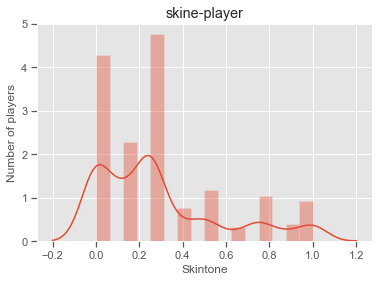

In [467]:
# todo y axis labels
players = players[players.skintone.notnull()] # drop missing data
sns.distplot(players.skintone, kde=True) # light skin more than dark skin
sns.utils.axlabel('Skintone', 'Number of players')
plt.title("skine-player")  
plt.show()

light skin player more than dark skin palyer.

In [468]:
players.shape

(1585, 11)

In [469]:
# skintone_mean['moreOneCard'].replace()

level of skintone get redcard by mean

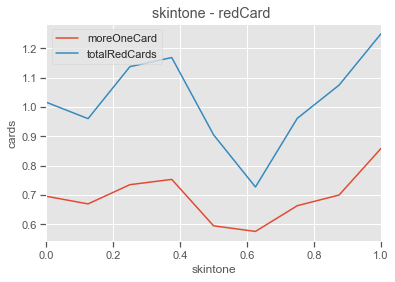

In [470]:
skintone_mean = players.groupby(['skintone']).mean()

skintone_mean[['moreOneCard','totalRedCards']].plot()
plt.title("skintone - redCard ", alpha=0.8)
plt.ylabel(u"cards") 
plt.legend(loc='upper left')

plt.show()

It is clear that there were significant changes in the amounts of both values.

The darkest skintone players have high opportunity get more than one card and redcard. 

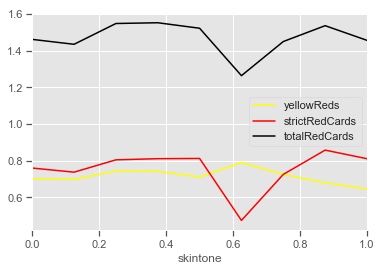

In [471]:
pivot_players=players[players['moreOneCard']].pivot_table(index=['skintone'],)
pivot_players[['yellowReds','strictRedCards','totalRedCards']].plot(color=['yellow','red','black'])
plt.show()

The pivot table told us if a player has been booked redCard is from yellowCard to redCard or strict redCard.
At skintone 0.6(might be Asian players) the yellow line is much higher than red line. It is a hint the players get caution more than dismissal from the field of play.

In [472]:
players.head()

,birthday,height,weight,position,rater1,rater2,yellowReds,strictRedCards,skintone,totalRedCards,moreOneCard
playerShort,,,,,,,,,,,
aaron-hughes,08.11.1979,182.0,71.0,Center Back,0.25,0.00,0,0,0.125,0,False
aaron-hunt,04.09.1986,183.0,73.0,Attacking Midfielder,0.00,0.25,0,1,0.125,1,True
aaron-lennon,16.04.1987,165.0,63.0,Right Midfielder,0.25,0.25,0,0,0.250,0,False
aaron-ramsey,26.12.1990,178.0,76.0,Center Midfielder,0.00,0.00,0,1,0.000,1,True
abdelhamid-el-kaoutari,17.03.1990,180.0,73.0,Center Back,0.25,0.25,1,1,0.250,2,True


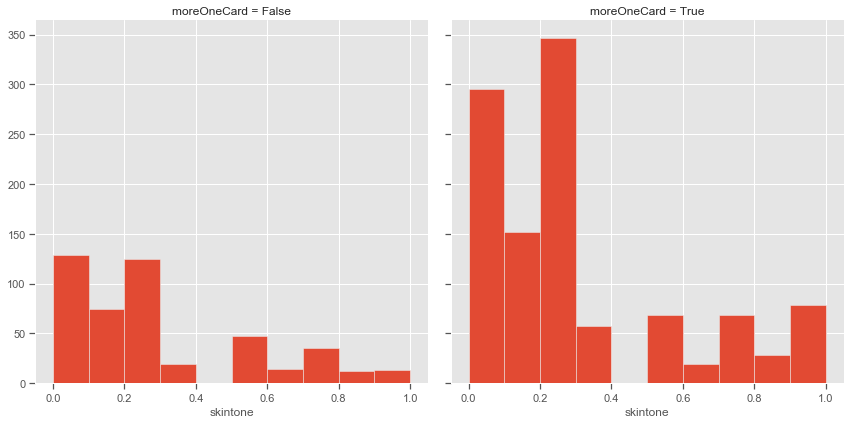

In [473]:
g = sns.FacetGrid(players, col="moreOneCard", height=6)
g.map(plt.hist, "skintone")
# plt.title("skine - red card")  


Form the diagram we could preliminary estimate players get red card has no related with skintone.
Analysing more reasoniable feature for red card.

### positions
Might the player's position correlate with the baseline susceptibility to redcards? 

In [474]:
defense = ['Center Back','Defensive Midfielder', 'Left Fullback', 'Right Fullback', ]
midfield = ['Right Midfielder', 'Center Midfielder', 'Left Midfielder',]
forward = ['Attacking Midfielder', 'Left Winger', 'Right Winger', 'Center Forward']
keeper = 'Goalkeeper'
# modifying dataframe -- adding the aggregated position categorical position_agg
players.loc[players['position'].isin(defense), 'position_agg'] = "Defense"
players.loc[players['position'].isin(midfield), 'position_agg'] = "Midfield"
players.loc[players['position'].isin(forward), 'position_agg'] = "Forward"
players.loc[players['position'].eq(keeper), 'position_agg'] = "Keeper"

In [475]:
players.head()

,birthday,height,weight,position,rater1,rater2,yellowReds,strictRedCards,skintone,totalRedCards,moreOneCard,position_agg
playerShort,,,,,,,,,,,,
aaron-hughes,08.11.1979,182.0,71.0,Center Back,0.25,0.00,0,0,0.125,0,False,Defense
aaron-hunt,04.09.1986,183.0,73.0,Attacking Midfielder,0.00,0.25,0,1,0.125,1,True,Forward
aaron-lennon,16.04.1987,165.0,63.0,Right Midfielder,0.25,0.25,0,0,0.250,0,False,Midfield
aaron-ramsey,26.12.1990,178.0,76.0,Center Midfielder,0.00,0.00,0,1,0.000,1,True,Midfield
abdelhamid-el-kaoutari,17.03.1990,180.0,73.0,Center Back,0.25,0.25,1,1,0.250,2,True,Defense


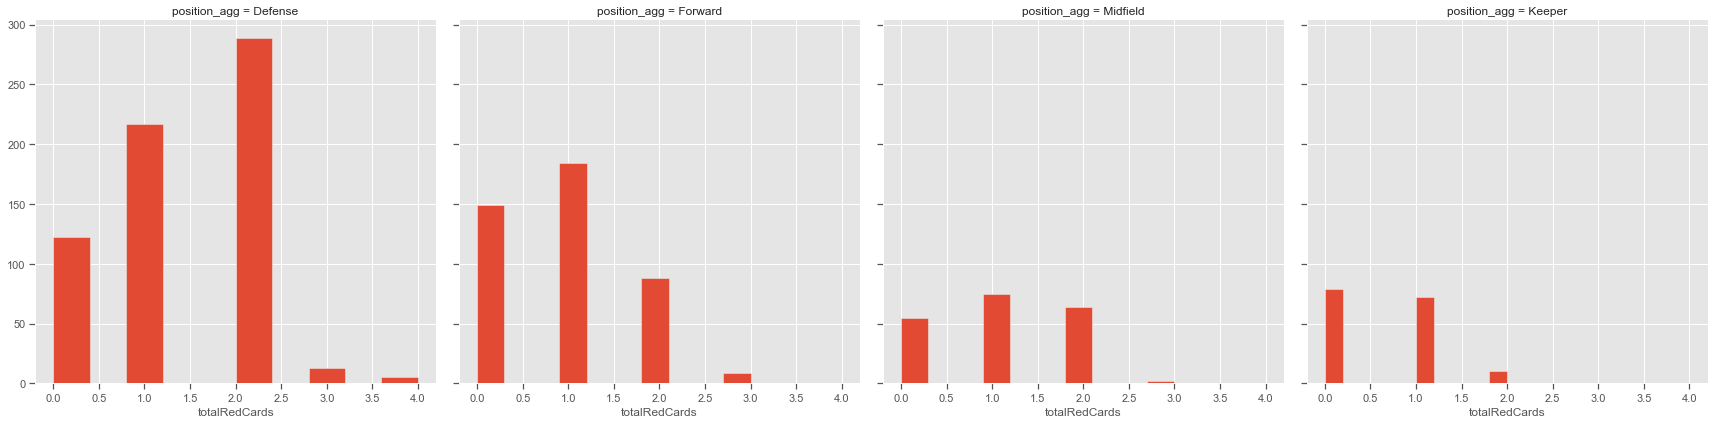

In [476]:
# ax = sns.catplot(x="position_agg", y="totalRedCards", data=players,
#                    height=10, kind="strip", palette="muted")
# ax.despine(left=True)

g = sns.FacetGrid(players, col="position_agg", height=6)
g.map(plt.hist, "totalRedCards")

The bar chart different types of position in terms of the overall number of redcard.
It is clear that type of defense('Center Back','Defensive Midfielder', 'Left Fullback', 'Right Fullback') is more easy get redcard.

In [477]:
players_cleaned = players.drop(labels=['rater1','rater2','position'],axis=1) # drop useless column
players_cleaned.head()

,birthday,height,weight,yellowReds,strictRedCards,skintone,totalRedCards,moreOneCard,position_agg
playerShort,,,,,,,,,
aaron-hughes,08.11.1979,182.0,71.0,0,0,0.125,0,False,Defense
aaron-hunt,04.09.1986,183.0,73.0,0,1,0.125,1,True,Forward
aaron-lennon,16.04.1987,165.0,63.0,0,0,0.250,0,False,Midfield
aaron-ramsey,26.12.1990,178.0,76.0,0,1,0.000,1,True,Midfield
abdelhamid-el-kaoutari,17.03.1990,180.0,73.0,1,1,0.250,2,True,Defense


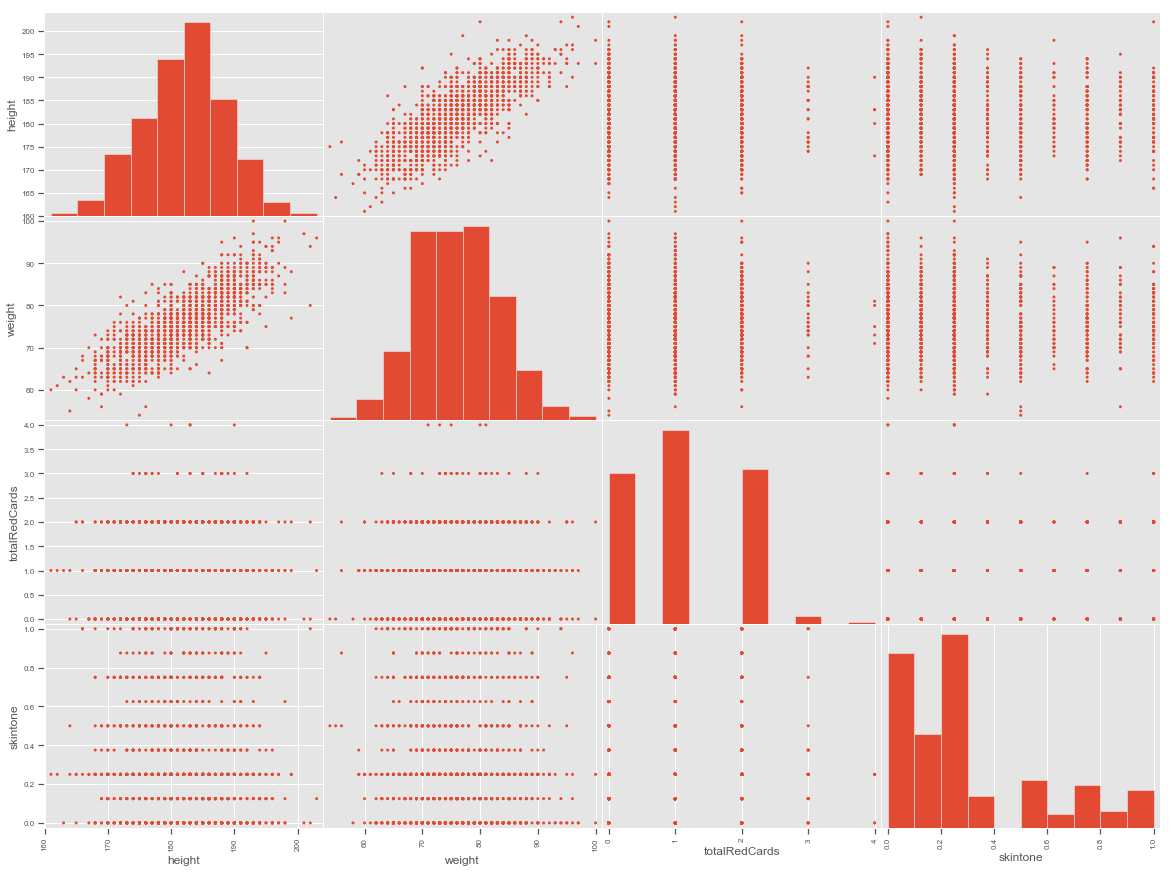

In [478]:
_ = pd.plotting.scatter_matrix(players_cleaned[["height",'weight','totalRedCards','position_agg',"skintone",]], alpha=1, figsize=(20, 15), diagonal='hist')


player personal features relationship chart.

In [479]:
players_cleaned.to_csv("cleaned_players.csv.gz", compression='gzip')

**The data belong to discrete random variable, not fit for linear regression**

In [480]:
# # mod = smf.ols(formula='Total ~ 1 + Exam', data=grades.dropna()).fit()
# players.exog = sm.add_constant(players.exog)
# logit = sm.Logit('moreOneCard ~ skintone',,data = players.dropna()).fit()


# # plt.fill_between(xd, yl, yu, alpha=0.3, facecolor='blue',edgecolor='none')
# # plt.show()
# mod.summary()

> ##  dark skin palyers have heigh rate to get redcard.



 ### players and referees

In [481]:
players = load_subgroup("cleaned_players.csv.gz")
players.head()

,birthday,height,weight,yellowReds,strictRedCards,skintone,totalRedCards,moreOneCard,position_agg
playerShort,,,,,,,,,
aaron-hughes,08.11.1979,182.0,71.0,0,0,0.125,0,False,Defense
aaron-hunt,04.09.1986,183.0,73.0,0,1,0.125,1,True,Forward
aaron-lennon,16.04.1987,165.0,63.0,0,0,0.250,0,False,Midfield
aaron-ramsey,26.12.1990,178.0,76.0,0,1,0.000,1,True,Midfield
abdelhamid-el-kaoutari,17.03.1990,180.0,73.0,1,1,0.250,2,True,Defense


get players from static file

In [482]:
dyads_index = ['refNum', 'playerShort']
dyads_cols = ['games', 'victories','ties', 'defeats', 'goals','yellowCards', 'yellowReds','redCards']
dyads = get_subgroup(data_frame, g_index=dyad_index, g_columns=dyad_cols)

In [483]:
dyads['totalRedCards'] = dyads['yellowReds'] + dyads['redCards'] # totalRedCards
dyads.rename(columns={'redCards': 'strictRedCards'}, inplace=True)
# dyads['totalRedCards'].dropna()
dyads.head()

games  victories  ties  defeats  goals  yellowCards  \
refNum playerShort                                                          
1      lucas-wilchez      1          0     0        1      0            0   
2      john-utaka         1          0     0        1      0            1   
3      abdon-prats        1          0     1        0      0            1   
       pablo-mari         1          1     0        0      0            0   
       ruben-pena         1          1     0        0      0            0   

                      yellowReds  strictRedCards  totalRedCards  
refNum playerShort                                               
1      lucas-wilchez           0               0              0  
2      john-utaka              0               0              0  
3      abdon-prats             0               0              0  
       pablo-mari              0               0              0  
       ruben-pena              0               0              0

In [484]:
# dyads.reset_index().head()

In [485]:
# dyads.reset_index().set_index('playerShort').head()

In [486]:
player_dyad = (players.merge(dyads.reset_index().set_index('playerShort'),
                                   left_index=True,
                                   right_index=True))
player_dyad.head()

,birthday,height,weight,yellowReds_x,strictRedCards_x,skintone,totalRedCards_x,moreOneCard,position_agg,refNum,games,victories,ties,defeats,goals,yellowCards,yellowReds_y,strictRedCards_y,totalRedCards_y
playerShort,,,,,,,,,,,,,,,,,,,
aaron-hughes,08.11.1979,182.0,71.0,0,0,0.125,0,False,Defense,4,1,0,0,1,0,0,0,0,0
aaron-hughes,08.11.1979,182.0,71.0,0,0,0.125,0,False,Defense,66,1,1,0,0,0,0,0,0,0
aaron-hughes,08.11.1979,182.0,71.0,0,0,0.125,0,False,Defense,77,26,13,8,5,0,0,0,0,0
aaron-hughes,08.11.1979,182.0,71.0,0,0,0.125,0,False,Defense,163,2,1,1,0,0,0,0,0,0
aaron-hughes,08.11.1979,182.0,71.0,0,0,0.125,0,False,Defense,194,16,3,5,8,0,2,0,0,0


In [487]:
player_dyad.shape

(124621, 19)

In [488]:
colnames = ['games', 'totalRedCards']
j = 0
out = [0 for i in range(sum(dyads['games']))]

for index, row in dyads.reset_index().iterrows():
    n = row['games']
    d = row['totalRedCards']
    ref = row['refNum']
    player = row['playerShort']
    for k in range(n):
        row['totalRedCards'] = 1 if (d-k) > 0 else 0
        rowlist=list([ref, player, row['totalRedCards']])
        out[j] = rowlist
        j += 1
tidy_dyads = pd.DataFrame(out, columns=['refNum', 'playerShort', 'redcard'],).set_index(['refNum', 'playerShort'])

In [489]:
print(tidy_dyads.shape)
tidy_dyads.redcard.sum()

(426572, 1)


3496

In [490]:
tidy_dyads.to_csv("tidy_dyads.csv.gz", compression='gzip')

the reason of save data is last function spend long time to coculate. 

In [491]:
clean_players = load_subgroup("cleaned_players.csv.gz")
tidy_dyads = load_subgroup("tidy_dyads.csv.gz")
clean_players.head()
tidy_dyads.head()

,playerShort,redcard
refNum,,
1,lucas-wilchez,0
2,john-utaka,0
3,abdon-prats,0
3,pablo-mari,0
3,ruben-pena,0


In [492]:
total_ref_given = tidy_dyads.groupby('refNum').sum().sort_values(ascending=False,by='redcard')
total_ref_given.head()
# total_ref_given.plot()

,redcard
refNum,
468,50
432,50
449,47
916,42
3099,37


finding the refree who is the most amount of redcards be given. 

Text(0.5,1,'redcard given by refree')

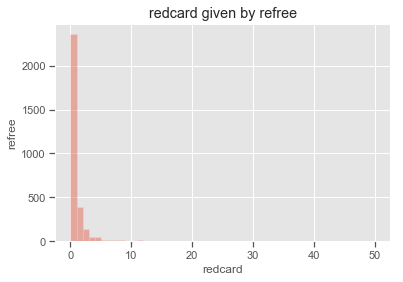

In [493]:
sns.distplot(total_ref_given, kde=False);
plt.ylabel('refree')
plt.xlabel('redcard')
plt.title('redcard given by refree')

the most of refrees do not give redcard out.

In [494]:

total_player_received = tidy_dyads.groupby('playerShort').sum().sort_values(ascending=False, by='redcard')
total_player_received.head()

,redcard
playerShort,
cyril-jeunechamp,19
sergio-ramos,19
gary-medel,16
juanfran,15
ballesteros,15


finding the player who is the most amount of redcards be recieved.

Text(0.5,1,'redcard given by refree')

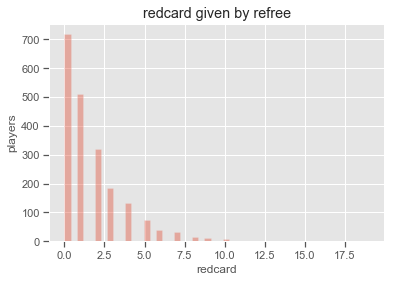

In [495]:
sns.distplot(total_player_received, kde=False);
plt.ylabel('players')
plt.xlabel('redcard')
plt.title('redcard given by refree')

the most of players do not revieve redcard.

In [497]:
player_ref_game = (tidy_dyads.reset_index()
                               .set_index('playerShort')
                               .merge(clean_players,left_index=True,right_index=True))

In [498]:
player_ref_game.shape

(373067, 11)

In [499]:
bootstrap = pd.concat([player_ref_game.sample(replace=True, 
                                              n=10000).groupby('skintone').mean() for _ in range(100)])


In [500]:
player_ref_game.sample(replace=True,n=10000).groupby('skintone').mean()

,refNum,redcard,height,weight,yellowReds,strictRedCards,totalRedCards,moreOneCard
skintone,,,,,,,,
0.000,1555.996271,0.006711,182.538404,76.338202,0.566368,0.609620,1.175988,0.772558
0.125,1452.544149,0.010768,182.674803,76.046695,0.516870,0.592965,1.109835,0.745872
0.250,1486.079301,0.010303,181.683948,76.336572,0.607243,0.694037,1.301280,0.807993
0.375,1256.736842,0.006865,181.052632,76.405034,0.610984,0.672769,1.283753,0.810069
0.500,1551.742698,0.011127,180.599444,75.323034,0.518776,0.611961,1.130737,0.702364
0.625,1561.107595,0.006329,181.917722,75.025316,0.556962,0.310127,0.867089,0.715190
0.750,1585.322526,0.003413,180.196581,75.532759,0.592150,0.592150,1.184300,0.776451
0.875,1644.380734,0.018349,183.238532,77.995413,0.711009,0.701835,1.412844,0.848624
1.000,1529.855960,0.016556,181.706954,75.878536,0.592715,0.751656,1.344371,0.899007


player_ref_game is quite large, using 'sample fucntion' to get 10000 sample 

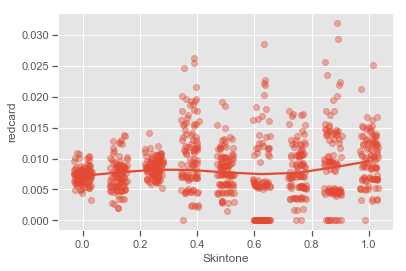

In [501]:
ax = sns.regplot(bootstrap.index.values,
                 y='redcard',
                 data=bootstrap,
                 lowess=True,
                 scatter_kws={'alpha':0.4,},
                 x_jitter=(0.125 / 4.0))
ax.set_xlabel("Skintone");

The line form the chat is not fluctuation. Just at end has little trend to up.

The diagram illustrates that most refrees are justice and equity to face each player.

But some of refrees have a propensity to give dark skintone players redcard more than light skintone players.
